In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
lr = LogisticRegression(C=1000.0, random_state=0)

In [4]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [5]:
from plot_decision_regions import plot_decision_regions

In [6]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.xlabel('petal length [standardized]')

Text(0.5,0,'petal length [standardized]')

In [9]:
plt.ylabel('petal width [standardized]')

Text(0,0.5,'petal width [standardized]')

In [10]:
plt.legend(loc='upper left')

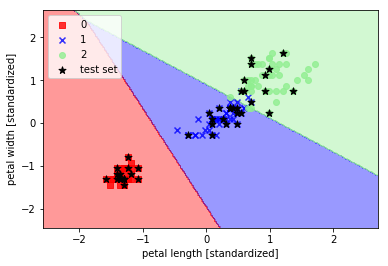

In [11]:
plt.show()

In [19]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])